## Project (E) 448
## Linear Regression - One-Dimensional Predictive Distribution
### Daniël S. van der Westhuizen
### 17158680

In [1]:
import numpy as np
import pylab as pl
from numpy.linalg import inv
from functions import *
import time

Here we aim to replicate the example in chapter 3.3 in Bishop's book. I will implement the code that is necessary to do so, but will implement it in such a way that input can easily be changed to a multi-dimensional one, as will be necessary in another demonstration.

The input (x) of the training data in this demonstration is 25 evenly spaced points on the interval [0,1].
The output is the function shown below with a Gaussian noise of variance 0.2

Time spent is 0.000481


(-0.01, 1.01)

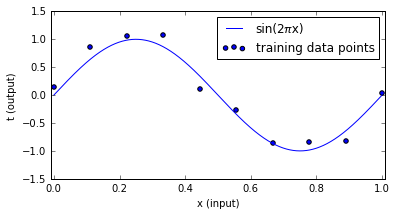

In [2]:
%matplotlib inline
pl.figure(figsize=(6,3))

c1 = time.clock()

#mathematics
N = 10
x = np.linspace(0,1,N)
#x = [ 0,0.45,0.55,1]
t = np.zeros(N)
for a in range(0,N):
    t[a] = np.sin(x[a]*2*np.pi) + np.random.normal(0,0.2)
    
c2 = time.clock()
print("Time spent is %f" % (c2-c1))
    
#figure
x_plot = np.linspace(0,1,10000)
pl.scatter(x,t,label="training data points")
pl.plot(x_plot,np.sin(x_plot*2*np.pi),label="sin(2πx)")
pl.xlabel("x (input)")
pl.ylabel("t (output)")
pl.legend(loc='upper right')
pl.xlim(-0.01,1.01)

The basis functions consists of Gaussian distributions with means evenly spaced over the interval [0,1] and each have variance of 0.2.

$$ \phi_j (x) = exp \left \{ - \frac{(x - \mu_j)^2)}{2s^2} \right \} \qquad (3.4) $$

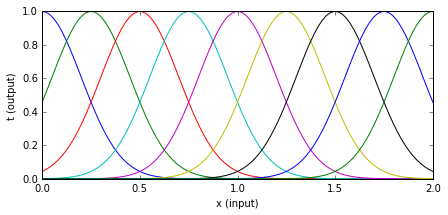

In [3]:
#set up each basis function as a column vector
#generate figure for demonstration
%matplotlib inline
pl.figure(figsize=(7,3))

#mathematics
s=0.2
mu = np.linspace(0,2,9)
phi_vector = ['0','0','0','0','0','0','0','0','0']
def phi(x,mu):
    phi = np.exp(-((x-mu)**2)/(2*(s**2)))
    return phi

#figure
x_plot = np.linspace(0,2,100)
for a in range(0,9):
    #print(phi(x,mu[a]))
    pl.plot(x_plot,phi(x_plot,mu[a]))
    phi_vector[a] = np.atleast_2d((phi(x_plot,mu[a]))).transpose()
pl.xlabel("x (input)")
pl.ylabel("t (output)")

For this demonstration the hyperparameters α and ß are arbitrarily chosen to be one and five. Beta was chosen based on randomly trying different values until one that works well was found.

In [4]:
alpha = 1
beta = 5

$$ \mu_{a|b} = \mu_a + \Sigma_{ab}\Sigma^{-1}_{bb} (x_b - \mu_b )  \qquad (2.81) $$

$$ \Sigma_{a|b} = \Sigma_{aa} + \Sigma_{ab}\Sigma^{-1}_{bb} \Sigma_{ba} \qquad (2.82) $$

Now we evaluate the design matrix, $S_N$, and $m_N$

$ \Phi = \left( \begin{array}{ccc}
\phi_0(\textbf{x}_1) & \phi_1(\textbf{x}_1) & \cdots & \phi_{M-1}(\textbf{x}_1) \\
\phi_0(\textbf{x}_2) & \phi_1(\textbf{x}_2) & \cdots & \phi_{M-1}(\textbf{x}_2) \\
\vdots               & \vdots               & \ddots & \vdots \\
\phi_0(\textbf{x}_N) & \phi_1(\textbf{x}_N) & \cdots & \phi_{M-1}(\textbf{x}_N) \end{array} \right)\ \qquad (3.16) $

$ \textbf{m}_N = \beta \textbf{S}_N \Phi^{\textsf{T}} \textbf{t} \qquad (3.53) $

$ \textbf{S}_{\textit{N}}^{-1} = \alpha \textbf{I} + \beta \Phi^{\textsf{T}} \Phi \qquad (3.54) $

In [5]:
c1 = time.time()

design_matrix = np.zeros((N,9))
for a in range(0,9):
    for b in range(0,N):
        design_matrix[b,a] = phi(x,mu[a])[b]
S_N = inv( alpha*(np.identity(9)) + beta*np.dot(design_matrix.transpose(),design_matrix) )
m_N = beta * (   np.dot( np.dot(S_N,design_matrix.transpose()), np.atleast_2d(t).transpose() ) )
c2 = time.time()  
print("Time spent is %f" % (c2-c1))

Time spent is 0.001018


Now we evaluate the output space using the function

$ p(\textit{t}|\textsf{x},\textbf{t},\alpha,\beta) = \mathcal{N}(\textit{t}|\textbf{m}_{N}^{T}\phi (\textsf{x}),\sigma_{N}^{2}(\textsf{x}))  \qquad (3.58) $ 

and

$ \sigma_N^2 (\textsf{x}) = \frac{1}{\beta} +\phi(\textsf{x})^T \textbf{S}_N \phi(\textsf{x})   \qquad (3.59) $

over the interval [0,2]

(-0.01, 1.01)

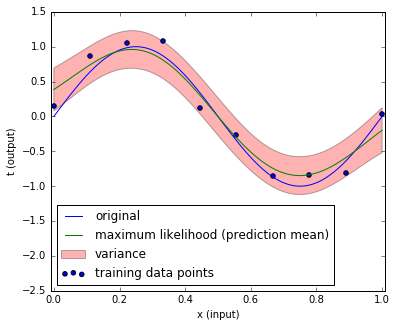

In [6]:
%matplotlib inline
pl.figure(figsize=(6,5))

N_pred = 100
x_pred = np.linspace(0,1,N_pred)

pred_means = np.zeros(N_pred)
pred_var = np.zeros(N_pred)
for c in range(0,N_pred):
    phi_vector_pred = np.zeros(9)
    for a in range(0,9):
        phi_vector_pred[a] = phi(x_pred[c],mu[a])
    phi_vector_pred = np.atleast_2d(phi_vector_pred).transpose()
    
    pred_means[c] = np.dot( m_N.transpose(), phi_vector_pred )
    pred_var[c] = (1/beta) + np.dot ( np.dot(phi_vector_pred.transpose(),S_N) , phi_vector_pred )
    
    
x_demo = np.linspace(0,1,100)
pl.plot(x_demo,np.sin(2*np.pi*x_demo),label='original')
pl.plot(x_pred,pred_means,label="maximum likelihood (prediction mean)")
#pl.plot(x_pred,pred_means+pred_var,'r-',label="variance")
#pl.plot(x_pred,pred_means-pred_var,'r-',)
pl.fill_between(x_pred,pred_means-pred_var,pred_means+pred_var,facecolor='red',alpha=0.3,label="variance")
pl.scatter(x,t,label="training data points")
pl.legend(loc='lower left')
pl.ylim(-2.5,1.5)
pl.xlabel("x (input)")
pl.ylabel("t (output)")
pl.xlim(-0.01,1.01)

In [7]:
theta0 = 1
theta1 = 5
theta2 = 1
theta3 = 1
beta = 4

x_train = np.atleast_2d(x).transpose()

x_test = np.atleast_2d(np.linspace(0,2,100)).transpose()
means = np.zeros(100)
var = np.zeros(100)
for a in range(0,100):
    C_N, k, k_T, c, C_N_full, inv_cov_N = gauss_proc_kern_reg_cov(x_train,x_test[a,:],theta0,theta1,theta2,theta3,beta)
    means[a] = gauss_proc_kern_reg_pred_mean(k_T,C_N,t, inv_cov_N)
    var[a] = gauss_proc_kern_reg_pred_var(c,k_T,C_N,k, inv_cov_N)

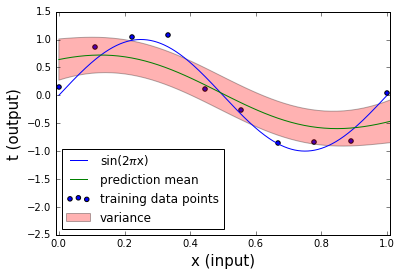

In [8]:
%matplotlib inline
pl.figure(figsize=(6,4))

x_orig_plot = np.linspace(0,1,10000)
pl.scatter(x_train,t,label="training data points")
pl.plot(x_orig_plot,np.sin(x_orig_plot*2*np.pi),label="sin(2πx)")
pl.xlim(-0.01,1.01)
pl.ylim((-2.5,1.5))
pl.ylabel('t (output)', fontsize=15)
pl.xlabel('x (input)', fontsize=15)

pl.plot(x_test,means,label="prediction mean")
pl.fill_between(x_test.ravel(),means-var,means+var,facecolor='red',alpha=0.3,label="variance")
pl.legend(loc='lower left')

In [9]:
N = 20
e1,e2,e3,e4,e5,e6,e7,e8 = optim_kern_param(theta0,theta1,theta2,theta3,beta,N,x_train,t)
theta0_new = e1; theta1_new = e2; theta2_new = e3; theta3_new = e4
theta0_array = e5; theta1_array = e6; theta2_array = e7; theta3_array = e8

In [10]:
x_test = np.atleast_2d(np.linspace(0,2,100)).transpose()
means = np.zeros(100)
var = np.zeros(100)
for a in range(0,100):
    C_N, k, k_T, c, C_N_full, inv_cov_N = gauss_proc_kern_reg_cov(x_train,x_test[a,:],theta0_new,theta1_new,theta2_new,theta3_new,beta)
    means[a] = gauss_proc_kern_reg_pred_mean(k_T,C_N,t, inv_cov_N)
    var[a] = gauss_proc_kern_reg_pred_var(c,k_T,C_N,k, inv_cov_N)

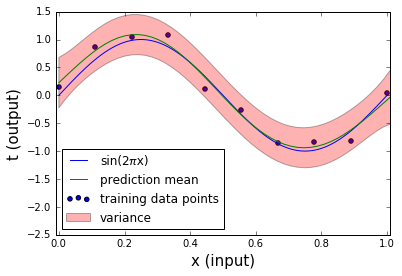

In [14]:
%matplotlib inline
pl.figure(figsize=(6,4))

x_orig_plot = np.linspace(0,1,10000)
pl.scatter(x_train,t,label="training data points")
pl.plot(x_orig_plot,np.sin(x_orig_plot*2*np.pi),label="sin(2πx)")
pl.xlim(-0.01,1.01)
pl.ylim((-2.5,1.5))
pl.ylabel('t (output)', fontsize=15)
pl.xlabel('x (input)', fontsize=15)

pl.plot(x_test,means,label="prediction mean")
pl.fill_between(x_test.ravel(),means-var,means+var,facecolor='red',alpha=0.3,label="variance")
pl.legend(loc='lower left')

In [18]:
N = 500
e1,e2,e3,e4,e5,e6,e7,e8 = optim_kern_param(theta0,theta1,theta2,theta3,beta,N,x_train,t)
theta0_new = e1; theta1_new = e2; theta2_new = e3; theta3_new = e4
theta0_array = e5; theta1_array = e6; theta2_array = e7; theta3_array = e8

In [19]:
x_test = np.atleast_2d(np.linspace(0,2,100)).transpose()
means = np.zeros(100)
var = np.zeros(100)
for a in range(0,100):
    C_N, k, k_T, c, C_N_full, inv_cov_N = gauss_proc_kern_reg_cov(x_train,x_test[a,:],theta0_new,theta1_new,theta2_new,theta3_new,beta)
    means[a] = gauss_proc_kern_reg_pred_mean(k_T,C_N,t, inv_cov_N)
    var[a] = gauss_proc_kern_reg_pred_var(c,k_T,C_N,k, inv_cov_N)

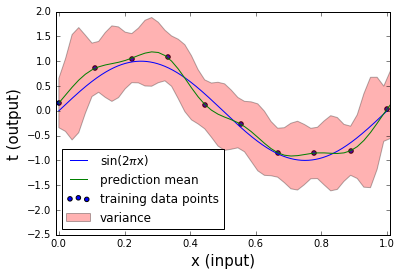

In [25]:
%matplotlib inline
pl.figure(figsize=(6,4))

x_orig_plot = np.linspace(0,1,10000)
pl.scatter(x_train,t,label="training data points")
pl.plot(x_orig_plot,np.sin(x_orig_plot*2*np.pi),label="sin(2πx)")
pl.xlim(-0.01,1.01)
pl.ylim((-2.5,2))
pl.ylabel('t (output)', fontsize=15)
pl.xlabel('x (input)', fontsize=15)

pl.plot(x_test,means,label="prediction mean")
pl.fill_between(x_test.ravel(),means-var,means+var,facecolor='red',alpha=0.3,label="variance")
pl.legend(loc='lower left')